In [75]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras.layers import Conv2D,Dense,Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [42]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [44]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)


In [39]:
X_train=X_train/255.0
X_test=X_test/255.0

In [72]:
model=Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'))
model.add(Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))



In [73]:

model.compile(
    loss=sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=[ 'accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 flatten_10 (Flatten)        (None, 32768)             0         
                                                     

In [74]:
hist = model.fit(X_train, y_train,
                 epochs=5,
                 validation_data=(X_test, y_test),batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 18s 10ms/step - loss: 3.7278 - accuracy: 0.1457 - val_loss: 3.4998 - val_accuracy: 0.2055
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 3.0200 - accuracy: 0.2599 - val_loss: 3.0201 - val_accuracy: 0.2955
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.6775 - accuracy: 0.3278 - val_loss: 2.7947 - val_accuracy: 0.3431
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4529 - accuracy: 0.3687 - val_loss: 4.2638 - val_accuracy: 0.2980
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3012 - accuracy: 0.4024 - val_loss: 3.8208 - val_accuracy: 0.3353


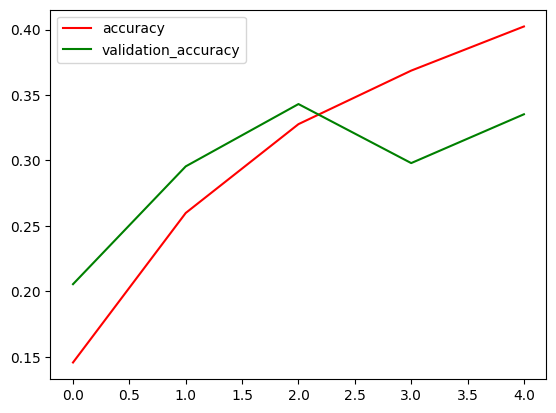

In [76]:
plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='validation_accuracy', color='green')
plt.legend()